In [88]:
import tensorflow as tf

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
import random


from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from IPython import display

from helper import *


In [89]:
raw_vedio_names = ["badboy.mp4","feel_special.mp4","kill_this_love.mp4","somi_birthday.mp4",
    "boombayah_blackpink.mp4","flower_shower.mp4","magnetic_moon_tiffany_young.mp4","sunmi_lalalay.mp4",
    "clc_me.mp4","fromis_9_fun.mp4","mamamoo_hip.mp4","swalla.mp4",
    "dumb_litty.mp4","gfriend_fever.mp4","red_velvet_umpah_umpah.mp4","vav_poison.mp4",
    "everglow_adios.mp4","gi_dle_uh_oh.mp4","red_velvet_zimzalabim.mp4","wjsn_boogie_up.mp4",
    "exid_me_and_you.mp4","jopping.mp4","snapping_chung_ha.mp4"]
vedio_names = []
for raw_vedio_name in raw_vedio_names:
    vedio_names.append(raw_vedio_name.split(".")[0])

In [120]:
x_max = 640
y_max = 320
def normalized(array):
    array = (array - [x_max / 2, y_max / 2]) / [x_max / 4, y_max / 4]
    return array

def denormalized(array):
    array = array * [x_max / 4, y_max / 4] + [x_max / 2, y_max / 2]
    return array

In [91]:
a = [i for i in range(3)]
print(a)

[0, 1, 2]


In [92]:
frame_per_sec = 20
truncate_sec=10
trunk_len = int(frame_per_sec * truncate_sec)
y_input_dim = 12
#(frame, example, input )

def get_array_trunks(x):
    return [x[(i*trunk_len):(i*trunk_len+trunk_len)] for i in range(int(len(x)/trunk_len))]

def get_normalized_flattened_reshaped_x(vedio_name):
    x = get_frames(vedio_name)
    print(len(x))
    x_arry =get_array_trunks(x)
    output = None
    for x_sliced in x_arry:
        formatted_x = format_x(x_sliced)
        if formatted_x is not None:
            if output is None:
                output = formatted_x
            else:
                output = np.append(output,formatted_x,axis=1)
    print("output",output.shape)
    return output

def format_x(x):
    if len(x) != trunk_len:
        print("time frame not long enough")
        return None
    x = np.array(x)
    x = normalized(x)
    x_flattened = x.reshape(x.shape[0], -1)
    assert(x_flattened.shape[1] == 50)
    x_reshape = np.reshape(x_flattened, (x_flattened.shape[0],1,x_flattened.shape[1]))
    return x_reshape
    
def get_sliced_normalized_flattened_reshaped_x(x):
    x = get_frames(vedio_name)
    x = np.array(x)
    x = normalized(x)
    print("original x shape:",x.shape)
    x_flattened = x.reshape(x.shape[0], -1)
    assert(x_flattened.shape[1] == 50)
    #print("x_flattened shape:",x_flattened.shape)
    x_reshape = np.reshape(x_flattened, (x_flattened.shape[0],1,x_flattened.shape[1]))
    return x_reshape
    
sample_x = get_normalized_flattened_reshaped_x("badboy")

def get_fake_y(real_y):
    return np.random.random_sample((real_y.shape[0],y_input_dim))

    
def get_y(vedio_name):
    y = get_feature_np_array(vedio_name)
    #y = get_fake_y(y)
    y_array= get_array_trunks(y)
    output = None
    for y_sliced in y_array:
        formatted_y = format_y(y_sliced)
        if formatted_y is not None:
            if output is None:
                output = formatted_y
            else:
                output = np.append(output,formatted_y,axis=1)
    print("output y",output.shape)
    return output

def format_y(y):
    if len(y) != trunk_len:
        print("time frame not long enough")
        return None
    y = np.array(y)
    y_reshape = np.reshape(y, (y.shape[0],1,y_input_dim))
    assert(y_reshape.shape[0] == trunk_len)
    y_reshape = y_reshape.astype(np.float32)
    #print("y_reshape",y_reshape.shape)
    return y_reshape

sample_y = get_y("badboy")

print("sample_x array shape is ", sample_x[0].shape)
print("sample_y array shape is ", sample_y[0].shape)

x_raw = []
y_raw = []
random.shuffle(vedio_names)
for vedio_name in vedio_names:
    x = get_normalized_flattened_reshaped_x(vedio_name)
    y = get_y(vedio_name)
    x_raw.append(x)
    y_raw.append(y)


print("x_raw len:",x)

#print("x_raw shape",x_raw.shape)
#print("y_raw shape",y_raw.shape)

4131
output (200, 20, 50)
output y (200, 20, 12)
sample_x array shape is  (20, 50)
sample_y array shape is  (20, 12)
3773
output (200, 18, 50)
output y (200, 18, 12)
3804
output (200, 19, 50)
output y (200, 19, 12)
4390
output (200, 21, 50)
output y (200, 21, 12)
4131
output (200, 20, 50)
output y (200, 20, 12)
3876
output (200, 19, 50)
output y (200, 19, 12)
3852
output (200, 19, 50)
output y (200, 19, 12)
3675
output (200, 18, 50)
output y (200, 18, 12)
4072
output (200, 20, 50)
output y (200, 20, 12)
3694
output (200, 18, 50)
output y (200, 18, 12)
3751
output (200, 18, 50)
output y (200, 18, 12)
3630
output (200, 18, 50)
output y (200, 18, 12)
3426
output (200, 17, 50)
output y (200, 17, 12)
3828
output (200, 19, 50)
output y (200, 19, 12)
3990
output (200, 19, 50)
output y (200, 19, 12)
4294
output (200, 21, 50)
output y (200, 21, 12)
4105
output (200, 20, 50)
output y (200, 20, 12)
4201
output (200, 21, 50)
output y (200, 21, 12)
3957
output (200, 19, 50)
output y (200, 19, 12)
4

In [6]:
print("x_raw[0].shape",x_raw[0].shape)

x_raw[0].shape (200, 19, 50)


In [7]:
def compute_lamb_pair_len(one_pose): 
    key_piont_pairs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[8,12],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    pair_len = np.zeros((len(key_piont_pairs),1))
    for i in range(len(key_piont_pairs)):
        pair_len[i] = np.linalg.norm(one_pose[key_piont_pairs[i][0]] - one_pose[key_piont_pairs[i][1]])
    return pair_len

def get_avg_lamb_len(x):
    key_piont_pairs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[8,12],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    x_poins = x.reshape(-1,25,2)
    pair_len = np.zeros((len(key_piont_pairs),1))
    #for i in range(len(key_piont_pairs)):
    #    for one_pose in x_poins:
    #        pair_len[i] += np.linalg.norm(one_pose[key_piont_pairs[i][0]] - one_pose[key_piont_pairs[i][1]])
    for one_pose in x_poins: 
        pair_len += compute_lamb_pair_len(one_pose)       
    
    pair_len = pair_len/x_poins.shape[0]
    return pair_len

print(get_avg_lamb_len(x_raw[0]))
print(get_avg_lamb_len(x_raw[1]))

AVG_PAIR_LEN = get_avg_lamb_len(x_raw[0])



def one_pose_lamb_loss(one_pose_flat_x,avg_lamb_len):
    one_pose = one_pose_flat_x.reshape(25,2)
    one_pose_pair_lens = compute_lamb_pair_len(one_pose)
    return sum(abs(one_pose_pair_lens - AVG_PAIR_LEN))
    
    

[[0.32307992]
 [0.09654091]
 [0.31655242]
 [0.30327383]
 [0.09569777]
 [0.32645721]
 [0.34397493]
 [0.7118098 ]
 [0.0684548 ]
 [0.60353968]
 [0.53229803]
 [0.05194771]
 [0.18712279]
 [0.10008936]
 [0.06880331]
 [0.59406554]
 [0.54457405]
 [0.06570672]
 [0.18652113]
 [0.07913625]
 [0.06951293]
 [0.08594354]
 [0.31502806]
 [0.30505689]]
[[0.28956824]
 [0.09875615]
 [0.30256183]
 [0.29553094]
 [0.09961328]
 [0.29873871]
 [0.29153304]
 [0.69584425]
 [0.07102552]
 [0.57417976]
 [0.53767305]
 [0.0499221 ]
 [0.16070506]
 [0.0613718 ]
 [0.06987146]
 [0.57107626]
 [0.54970897]
 [0.04667058]
 [0.15318295]
 [0.05108472]
 [0.06542028]
 [0.13142063]
 [0.48991734]
 [0.16502806]]


In [106]:

def build_model():
    model = tf.keras.Sequential()

    model.add(layers.LSTM(100, input_shape=(None,y_input_dim),return_sequences=True))
    #model.add(layers.LeakyReLU())
    #model.add(layers.Dense(512))
    #model.add(layers.LeakyReLU())
    model.add(layers.Dense(50))
    #model.add(layers.LeakyReLU())
    #print(model.output_shape)
    #assert model.output_shape == (50)
    
    return model
model = build_model()

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 100)         45200     
_________________________________________________________________
dense_6 (Dense)              (None, None, 50)          5050      
Total params: 50,250
Trainable params: 50,250
Non-trainable params: 0
_________________________________________________________________


In [107]:
#model.compile('sgd', loss=tf.keras.losses.MeanSquaredError())
#model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [108]:
example_batch_predictions = model(y_raw[0],training=False)
print("example_batch_predictions shape",example_batch_predictions.shape)
print("x_raw[0] shape",x_raw[0].shape)

#def loss(y_true, y_predict):
#    return tf.keras.losses.MSE(
#    y_true,
#    y_predict
#)
loss = tf.keras.losses.MeanSquaredError()

#def gen_loss(y_true,y_pred):
#    return tf.keras.losses.MeanSquaredError(y_true=y_true,y_predict=y_predict)


example_batch_loss  = loss(y_true=x_raw[0], y_pred=example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")

print("scalar_loss:      ", example_batch_loss)




example_batch_predictions shape (200, 18, 50)
x_raw[0] shape (200, 18, 50)
Prediction shape:  (200, 18, 50)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       Tensor("mean_squared_error_19/weighted_loss/value:0", shape=(), dtype=float32)


In [109]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [110]:
EPOCHS=200

#gen_input = tf.placeholder(tf.float32, shape=[None, None, y_input_dim], name='input_noise')
#expect_output = tf.placeholder(tf.float32, shape=[None, None, 50], name='expect_output')
LSTM_input = tf.placeholder(tf.float32, shape=[None, None, y_input_dim], name='LSTM_input')
pose_output = tf.placeholder(tf.float32, shape=[None, None, 50], name='pose_output')


# Build Generator Network
gen_sample = model(LSTM_input)

# Build Optimizers
optimizer = tf.train.AdamOptimizer(1e-4)

# Create training operations
train_gen = optimizer.minimize(loss(gen_sample,pose_output), var_list=model.trainable_variables)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

gen_loss = loss(gen_sample,pose_output)


In [111]:
def train(sess, x, y, epochs):
    #generator.load_weights('a_save_generator_check_point')
    #discriminator.load_weights('a_save_discriminator_check_point')
    #model.load_weights('a_save_generator_check_point')
    for epoch in range(epochs):
        start = time.time()
        for i in range(len(x)):
            feed_dict = {pose_output: x[i], LSTM_input: y[i]}
            _, gl = sess.run([train_gen, gen_loss], feed_dict=feed_dict)
            #_, dl = sess.run([train_disc, disc_loss], feed_dict=feed_dict)
        gls.append(gl)
        #dls.append(dl)
        if(epoch % 10 == 0): 
            print ('Time for epoch {} is {} sec'.format(epoch, time.time()-start))
            print ('  generator loss: {}'.format(gl))
            model.save_weights('a_save_generator_check_point')

In [112]:
sess = tf.Session()
init_op = tf.global_variables_initializer()

sess.run(init_op)

gls = []


print(x_raw[0].shape)
train(sess, x_raw, y_raw, EPOCHS)

plt.plot(gls)

plt.show()

(200, 18, 50)
Time for epoch 0 is 1.1455388069152832 sec
  generator loss: 31.76480484008789
Time for epoch 10 is 0.5160708427429199 sec
  generator loss: 21.612741470336914
Time for epoch 20 is 0.5140008926391602 sec
  generator loss: 19.883760452270508
Time for epoch 30 is 0.5161154270172119 sec
  generator loss: 19.364757537841797
Time for epoch 40 is 0.5170290470123291 sec
  generator loss: 19.05204963684082
Time for epoch 50 is 0.5188465118408203 sec
  generator loss: 18.821821212768555
Time for epoch 60 is 0.5208761692047119 sec
  generator loss: 18.639352798461914
Time for epoch 70 is 0.5217206478118896 sec
  generator loss: 18.488187789916992
Time for epoch 80 is 0.5198361873626709 sec
  generator loss: 18.35990333557129
Time for epoch 90 is 0.5286974906921387 sec
  generator loss: 18.248695373535156
Time for epoch 100 is 0.5162885189056396 sec
  generator loss: 18.151241302490234
Time for epoch 110 is 0.5174589157104492 sec
  generator loss: 18.06501007080078
Time for epoch 12

In [121]:
generated_frame = model((np.array(y_raw[0][:,0,:]).reshape(200,1,12)), training=False)
#discriminator_out = discriminator(((np.array(x_raw[0][:,0,:])).reshape(200,1,50)), training=False)
print(generated_frame)
print("generated_frame.shape",generated_frame.shape)


#gen_output, disc_output = sess.run([generated_frame, discriminator_out])
[gen_output] = sess.run([generated_frame])
print(len(gen_output))
gen_output = np.reshape(gen_output, (gen_output.shape[0], gen_output.shape[2]))
gen_output = np.reshape(gen_output, (gen_output.shape[0], 25, 2))
print(denormalized(gen_output))
print(np.sum(gen_output))
#print("disc_output",disc_output)
#print(np.sum(disc_output)/disc_output.shape[0])
denormalized_gen_output = denormalized(gen_output)
print(denormalized_gen_output.shape)


Tensor("sequential_6_4/dense_6/BiasAdd:0", shape=(200, 1, 50), dtype=float32)
generated_frame.shape (200, 1, 50)
200
[[[340.57759047 165.89562297]
  [338.75733733 171.73520565]
  [337.18555331 171.78578138]
  ...
  [337.17451572 192.245543  ]
  [337.14116693 190.18144369]
  [335.97192645 189.3053031 ]]

 [[340.43717623 165.88032722]
  [338.57733011 171.73108101]
  [337.08190203 171.67338133]
  ...
  [337.32226849 192.03283787]
  [336.86959505 189.89911318]
  [335.81389546 189.07110214]]

 [[340.29625893 165.81185699]
  [338.40483427 171.47723794]
  [337.06773043 171.55134201]
  ...
  [337.22374439 191.82852268]
  [337.11791158 189.7178793 ]
  [335.69482565 188.87053967]]

 ...

 [[338.78935099 165.42947769]
  [337.0354259  170.39596558]
  [335.52072048 170.54568052]
  ...
  [336.81547284 189.78540897]
  [336.39291286 187.85595894]
  [334.45541501 186.89969778]]

 [[338.75884771 165.42930841]
  [336.98892593 170.36268473]
  [335.55004358 170.55364013]
  ...
  [336.90635443 189.92095947]

In [122]:
from visualize import *

input_images[0] 360
input_images[0][0] 640


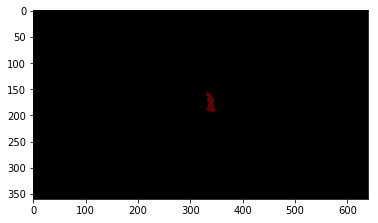

In [125]:
vectors_to_video(denormalized_gen_output,output_path='/home/ubuntu/dance-to-beats/src/model/output_gan.avi',frame_size=(640,360),begin_frame=0,end_frame=199)


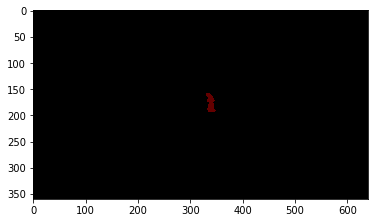

In [124]:
plt.imshow(draw_one_frame(denormalized_gen_output[100]))